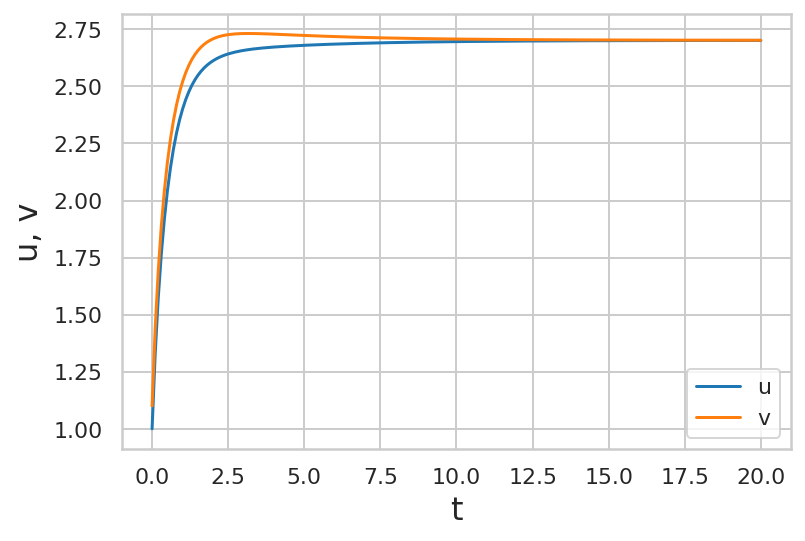

In [130]:
import numpy as np
import scipy.integrate
import scipy.optimize

import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', context='notebook', palette=colors, 
        rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

def toggle(uv, t, a, n):
    u, v = uv
    return np.array([a / (1 + v**n) - u,
                    (a / (1 + u**n) - v)])


a = 10;
n = 1;
args = (a, n);
uv0 = np.array([1, 1.1])
t = np.linspace(0, 20, 200)
uv = scipy.integrate.odeint(toggle, uv0, t, args=args)

plt.plot(t, uv)
plt.xlabel('t')
plt.ylabel('u, v')
plt.legend(('u', 'v'));


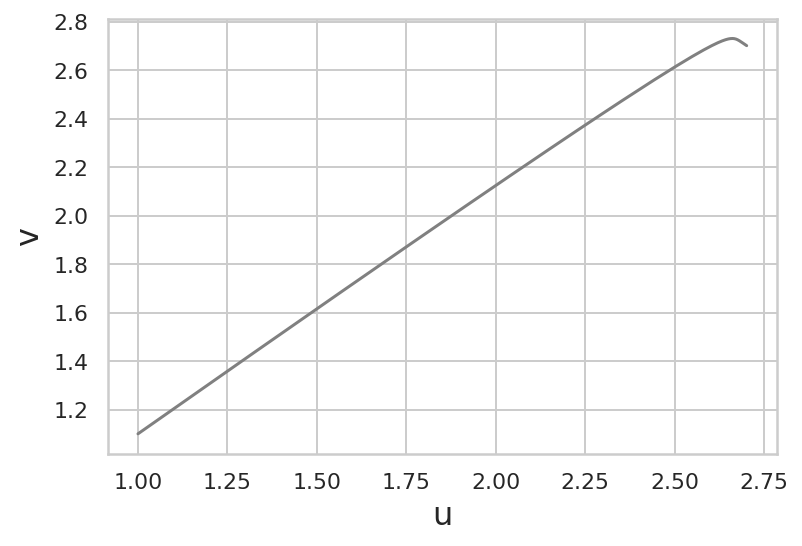

In [116]:
plt.plot(uv[:,0], uv[:,1], color='gray')
plt.xlabel('u')
plt.ylabel('v');

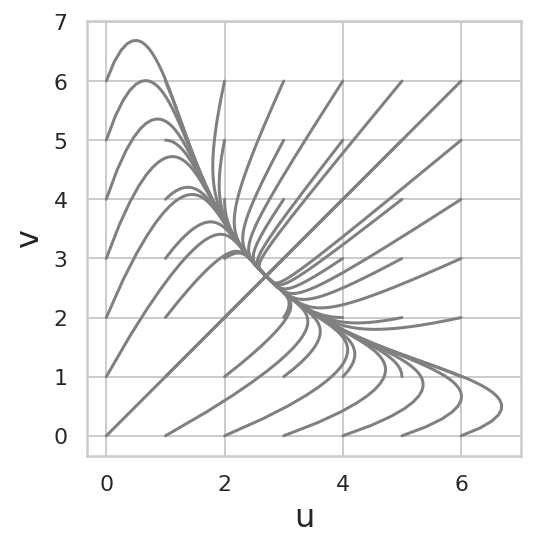

In [131]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_aspect('equal')

for u0 in range(7):
    for v0 in range(7):
        uv = scipy.integrate.odeint(toggle, np.array([u0, v0]), t, args=args)
        ax.plot(*uv.transpose(), color='gray');

In [0]:
def plot_flow_field(ax, f, a_range, b_range, args=(), n_grid=200):
    
    a = np.linspace(a_range[0], a_range[1], n_grid)
    b = np.linspace(b_range[0], b_range[1], n_grid)
    aa, bb = np.meshgrid(a, b)

    a_vel = np.empty_like(aa)
    b_vel = np.empty_like(bb)
    for i in range(aa.shape[0]):
        for j in range(aa.shape[1]):
            a_vel[i,j], b_vel[i,j] = f(np.array([aa[i,j], bb[i,j]]), None, *args)

    speed = np.sqrt(a_vel**2 + b_vel**2)
    lw = 0.2 + 2.5 * speed / speed.max()

    ax.streamplot(aa, bb, a_vel, b_vel, linewidth=lw, arrowsize=1.3, 
                  density=1, color='thistle')

    return ax

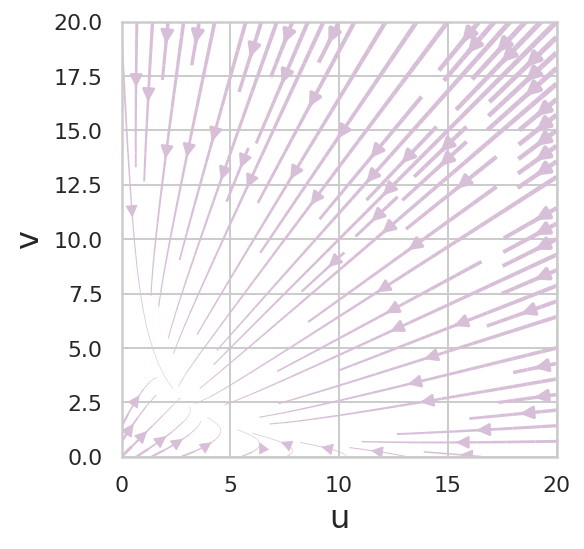

In [132]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_aspect('equal')

ax = plot_flow_field(ax, toggle, (0, 20), (0, 20), args=args)

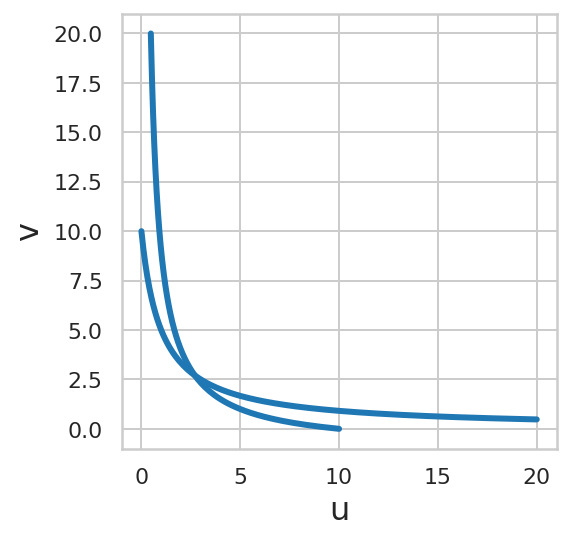

In [119]:
def plot_null_clines_toggle(ax, u_range, v_range, a, n, 
                            colors=['#1f77b4', '#1f77b4'], lw=3):

    nca_v = np.linspace(v_range[0], v_range[1], 200)
    nca_u = a / (1 + nca_v**n)


    ncb_u = np.linspace(u_range[0], u_range[1], 200)
    ncb_v = a / (1 + ncb_u**n)

    # Plot
    ax.plot(nca_u, nca_v, lw=lw, color=colors[0])
    ax.plot(ncb_u, ncb_v, lw=lw, color=colors[1])
    
    return ax
    
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_aspect('equal')
ax = plot_null_clines_toggle(ax, [0, 20], [0, 20], a, n)

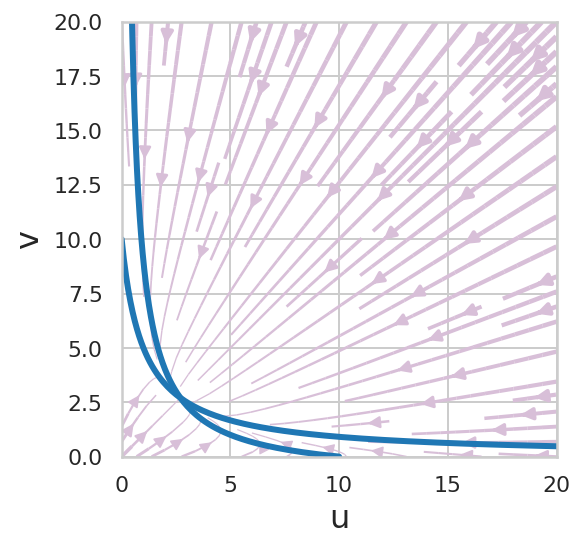

In [120]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_aspect('equal')

u_range = [0, 20]
v_range = [0, 20]
ax = plot_flow_field(ax, toggle, u_range, v_range, args=args)
ax = plot_null_clines_toggle(ax, u_range, v_range, a, n)